<a href="https://colab.research.google.com/github/lcbjrrr/algojust/blob/main/Pmpt01_confirmation_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Confirmation bias**: The tendency to search for, interpret, favor, and recall information that confirms one's existing beliefs or values. This can lead to selective data analysis and distorted findings. For instance, a teacher who believes boys are better at math might unconsciously call on them more frequently, reinforcing their belief.

- **Outlier bias**: Outliers or anomalies in the data can skew the results, especially when using averages. Using the median instead of the average can help mitigate this.
Measurement bias: Occurs when data collected for training differs from data collected in the real world or when faulty measurements distort data. This can result in lower accuracy for models.


*The data used herein is for illustrative purposes only and does not reflect actual real-world data*




> Read the file 'Classes - oks.csv' and show the dataframe



In [10]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Classes - oks.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,Klevel,girl,math,lang,read,write
0,1,0,63,47,54,52
1,1,1,72,69,76,66
2,1,0,68,51,57,46
3,1,1,65,67,76,72
4,1,0,69,50,52,46


#### Are boys (on average) better than girls at Math?



> Create a aggregated table grouping by Gender the Average Math grade



In [11]:
# Group by 'girl' (gender) and calculate the average 'math' grade
average_math_by_gender = df.groupby('girl')['math'].mean()

# Display the result
print(average_math_by_gender)

girl
0    66.896552
1    66.266667
Name: math, dtype: float64




> Create a bar chart comparing those



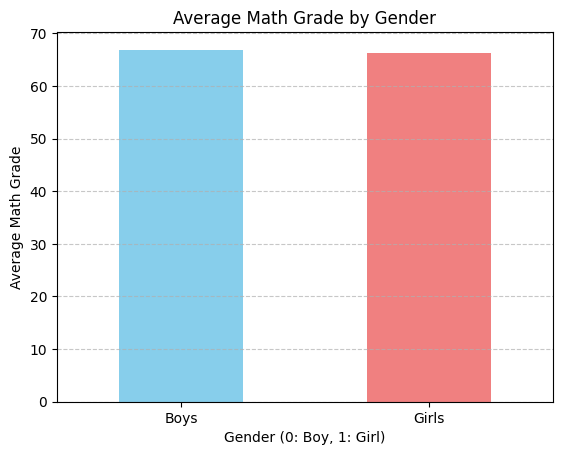

In [12]:
import matplotlib.pyplot as plt

# Create a bar chart
average_math_by_gender.plot(kind='bar', color=['skyblue', 'lightcoral'])

# Set title and labels
plt.title('Average Math Grade by Gender')
plt.xlabel('Gender (0: Boy, 1: Girl)')
plt.ylabel('Average Math Grade')
plt.xticks(ticks=[0, 1], labels=['Boys', 'Girls'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

*Observe that the bar for boys (Gender 0) is slightly taller than the bar for girls (Gender 1). This visually represents that, according to this dataset, boys have a marginally higher average Math grade (approximately 66.9) compared to girls (approximately 66.3)*

#### How about if break it down by grade/K-level?



> Create now a aggregated table grouped by KLevel and then gender, calculating the average for the math grade



In [13]:
average_math_by_klevel_gender = df.groupby(['Klevel', 'girl'])['math'].mean()

print(average_math_by_klevel_gender)

Klevel  girl
1       0       71.500000
        1       66.000000
2       0       67.500000
        1       66.600000
3       0       66.166667
        1       65.200000
4       0       67.000000
        1       68.200000
5       0       65.166667
        1       66.400000
6       0       66.500000
        1       65.800000
7       0       66.666667
        1       65.800000
8       0       65.333333
        1       66.000000
9       0       66.500000
        1       66.400000
Name: math, dtype: float64




> Using seaborn, create a bar chart comparing those






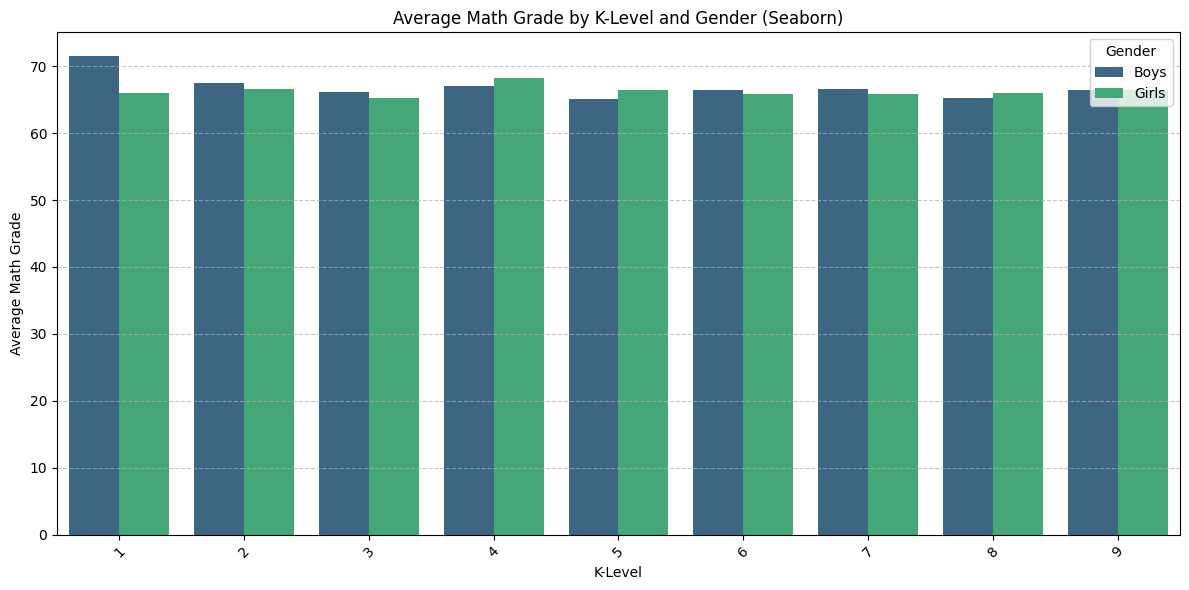

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index to turn Klevel and girl into columns, then melt for seaborn
plot_data_seaborn = average_math_by_klevel_gender.reset_index()
plot_data_seaborn['gender_label'] = plot_data_seaborn['girl'].map({0: 'Boys', 1: 'Girls'})

plt.figure(figsize=(12, 6))
sns.barplot(x='Klevel', y='math', hue='gender_label', data=plot_data_seaborn, palette='viridis')

# Set title and labels
plt.title('Average Math Grade by K-Level and Gender (Seaborn)')
plt.xlabel('K-Level')
plt.ylabel('Average Math Grade')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

*While the initial overall average showed boys with a marginally higher score, this granular analysis by K-level reveals that the performance varies. Neither gender consistently outperforms the other across all K-levels by a large margin, and there are reversals in who scores higher at different educational stages. The differences are often quite small, indicating that other factors might be more influential than gender at specific K-levels.*

#### Is there a chance that particular boy affects the average greatly (outliers)?



> Create a boxplot for the math grade, broken down by Klevel and separete by color (hue) on gender



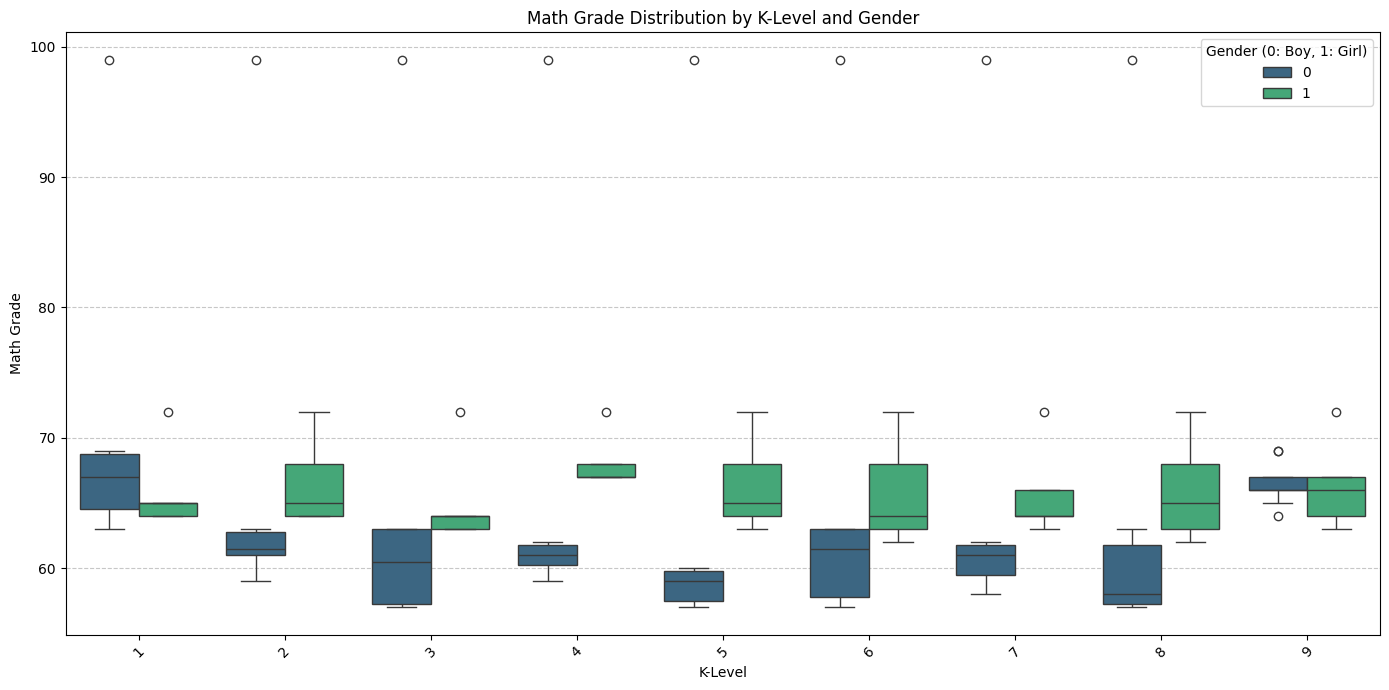

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.boxplot(x='Klevel', y='math', hue='girl', data=df, palette='viridis')

# Set title and labels
plt.title('Math Grade Distribution by K-Level and Gender')
plt.xlabel('K-Level')
plt.ylabel('Math Grade')
plt.xticks(rotation=45)
plt.legend(title='Gender (0: Boy, 1: Girl)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

*For many K-levels, particularly K-level 1 (boys), K-level 4 (boys and girls), K-level 5 (boys), K-level 6 (boys), and K-level 7 (boys), there are grades clustered around 99-100. These are the most prominent outliers, indicating students with exceptionally high math scores. While these could be genuine top performers, their presence can disproportionately influence average calculations*.

*Both boys and girls have outliers. For instance, in K-level 4, both genders show high-scoring outliers. However, in some other K-levels like 1, 5, 6, and 7, the visible outliers predominantly belong to boys. This doesn't necessarily mean girls don't have high performers, but perhaps fewer extreme high scores that fall outside the general distribution for their group in those specific K-levels*.

#### What if we take out those outlier?



> Create a new dataframe filtering out any math grade above 98



In [16]:
df_filtered = df[df['math'] <= 98]

print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)
print("\nFirst 5 rows of the filtered DataFrame:")
display(df_filtered.head())

Original DataFrame shape: (103, 6)
Filtered DataFrame shape: (95, 6)

First 5 rows of the filtered DataFrame:


,Klevel,girl,math,lang,read,write
0,1,0,63,47,54,52
1,1,1,72,69,76,66
2,1,0,68,51,57,46
3,1,1,65,67,76,72
4,1,0,69,50,52,46




> Using seaborn, create a bar chart comparing those



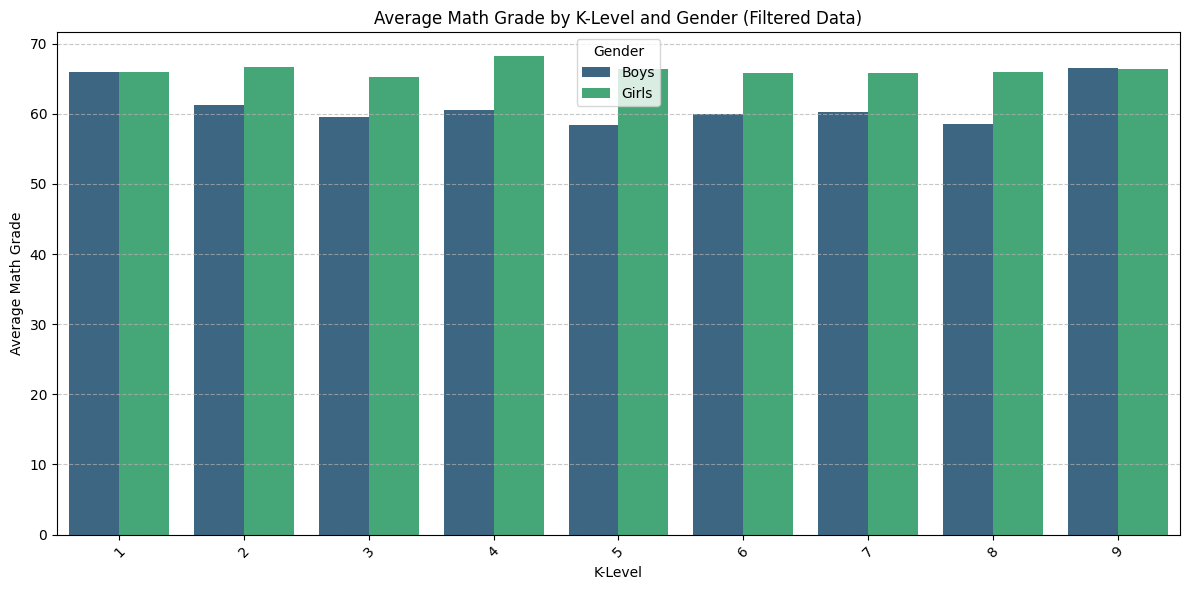

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average math grade by K-level and gender using the filtered DataFrame
average_math_by_klevel_gender_filtered = df_filtered.groupby(['Klevel', 'girl'])['math'].mean()

# Reset index to turn Klevel and girl into columns, then map gender labels
plot_data_seaborn_filtered = average_math_by_klevel_gender_filtered.reset_index()
plot_data_seaborn_filtered['gender_label'] = plot_data_seaborn_filtered['girl'].map({0: 'Boys', 1: 'Girls'})

plt.figure(figsize=(12, 6))
sns.barplot(x='Klevel', y='math', hue='gender_label', data=plot_data_seaborn_filtered, palette='viridis')

# Set title and labels
plt.title('Average Math Grade by K-Level and Gender (Filtered Data)')
plt.xlabel('K-Level')
plt.ylabel('Average Math Grade')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

#### Are there still outliers? Are they really outliers or simply top performers? Are they boys or girls now?



> Create a boxplot for the math grade, broken down by Klevel and separete by color (hue) on gender



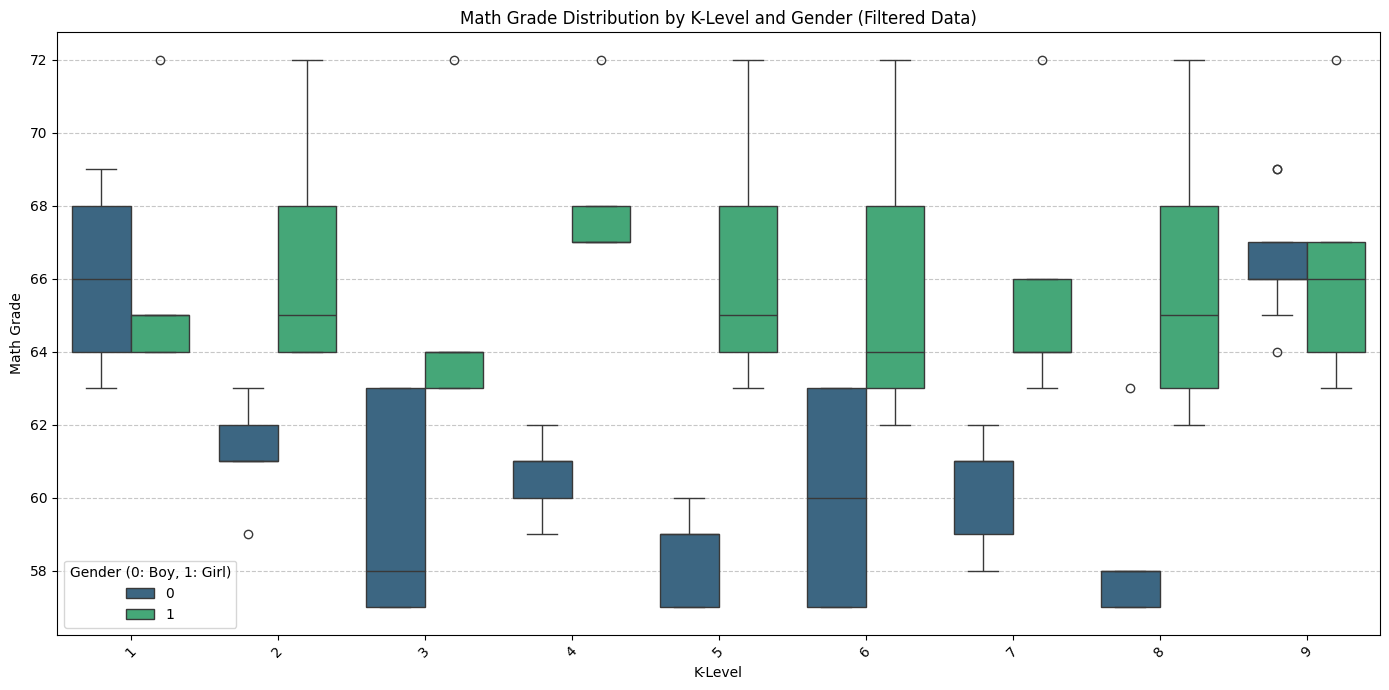

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.boxplot(x='Klevel', y='math', hue='girl', data=df_filtered, palette='viridis')

# Set title and labels
plt.title('Math Grade Distribution by K-Level and Gender (Filtered Data)')
plt.xlabel('K-Level')
plt.ylabel('Math Grade')
plt.xticks(rotation=45)
plt.legend(title='Gender (0: Boy, 1: Girl)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

*Looking closely, some of these new, lower-value outliers appear for both boys and girls. For example, in K-level 1, there's a boy with a score significantly lower than his peers. In K-level 2, some boys are scoring quite low. For girls, some K-levels (e.g., K-level 5, 8) also show individual low scores that might be considered outliers.*

## Activity: Confirmation and Outlier bias

**Problem**
Search Kaggle for a dataset containing a quantifiable characteristic and identifiable groupings/categories and create your ownhypothesis on comparing this measurable characteristic between the groups within a dataset (for example, people smoke more in Europe than in the USA). Then:
- *Assumption Validation*: Determine if your initial hypothesis holds true by comparing a measurable characteristic between your chosen groups.
- *Sub-level Breakdown*: Investigate variations by examining the characteristic at more granular sub-levels within your main categories (e.g., breakdown by countries).
- *Outlier Handling*: Identify and remove outliers from your data, then re-perform the analysis to see how the results change without their influence.

**Conclusion and Bias Assessment**
Formulate a conclusion about your assumption's confirmation based on both analyses (with and without outliers), and critically discuss the impact of outliers and any potential confirmation bias in your findings.